# import

In [157]:
import pandas as pd
import typing_extensions
from scipy.interpolate import interp1d
import csv
import json
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from ydata_profiling import ProfileReport, compare

In [ ]:
df = pd.read_csv("heart_disease_uci-books.csv")
report = ProfileReport(
    df,
    title="Trending Books",
    dataset={
        "description": "This profiling report was generated for the datacamp learning resources.",
        "author": "Satyam Tripathi",
        "copyright_holder": "DataCamp, Inc.",
        "copyright_year": 2023,
        "url": "<https://www.datacamp.com/>",
    },
)
report.to_notebook_iframe()

## 1. - Exploratory Data Analysis

In [ ]:
dataset = pd.read_csv('heart_disease_uci.csv')

dataset = dataset.iloc[:, 1:]
#dataset = dataset[["age","sex","trestbps","chol","thalch","ca"]]

# Clean dataset

In [ ]:
report = ProfileReport(df=dataset, title="Heart disease data")
report.to_file("profile_report.html")

## **categorical variables**

In this section we analize and transform categorical variables. Indeed the treatment of categorical variables holds a significant role in uncovering patterns, drawing insights, and making informed decisions. Categorical variables, which represent qualitative characteristics, often come in the form of labels or groups rather than numerical values. One essential technique in handling these variables is factorization, a process that transforms categorical labels into a numerical format, facilitating their incorporation into mathematical models.


In certain analytical contexts, the decision to encode categorical variables as 0, 1, 2 (and potentially 3) is driven by the need to convey the severity or magnitude of a phenomenon. This encoding scheme is particularly relevant when dealing with variables that exhibit an inherent ordinal nature, where the order among categories implies a certain level of intensity or significance.

## gender

In [ ]:
dataset = pd.read_csv('heart_disease_uci.csv')

dataset = dataset.iloc[:, 1:]

In [225]:
#FBS
# 0 == FALSE , 1 == TRUE
dataset['fbs'] = dataset['fbs'].map({False: 0, True: 1})

dataset['fbs'] = pd.to_numeric(dataset['fbs'], errors='coerce')

In [226]:
#SEX
# 0 == MALE , 1 == FEMALE
dataset['sex'] = dataset['sex'].map({"Male": 0, "Female": 1})

In [227]:
#EXANG
# 0 == FALSE , 1 == TRUE
dataset['exang'] = dataset['exang'].map({False: 0, True: 1})
dataset['exang'] = pd.to_numeric(dataset['exang'], errors='coerce')

In [228]:
#restecg
dataset['restecg'] = dataset['restecg'].map({"normal": 0, "st-t abnormality": 1, "lv hypertrophy":2})

In [229]:
#slope
dataset['slope'] = dataset['slope'].map({"downsloping": 0, "flat": 1, "upsloping":2})

In [230]:
#cp
dataset['cp'] = dataset['cp'].map({"asymptomatic": 0, "non-anginal": 1, "typical angina":2, "atypical angina": 3})

In [231]:
#hearth attack
dataset['num'] = dataset['num'].map({0: 0, 1: 1, 2:1,3:1,4:1})

In [232]:
dataset = dataset.drop("thal", axis = 1)
dataset = dataset.drop("ca", axis = 1)
dataset = dataset.drop("dataset", axis = 1)

In [233]:
dataset

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,0,2,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0
1,2,67,0,0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,1
2,3,67,0,0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,1
3,4,37,0,1,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41,1,3,130.0,204.0,0.0,2.0,172.0,0.0,1.4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,1
916,917,62,0,2,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,0
917,918,55,0,0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,1
918,919,58,0,0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [224]:
dataset = pd.read_csv('/content/drive/MyDrive/FDS_final/heart_disease_uci.csv')

In [205]:
dataset.isna().sum()

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64

In [234]:
# Supponiamo che 'x' sia la colonna delle posizioni e 'y' sia la colonna delle pendenze
x = dataset['slope'].index.tolist()

# Assuming 'x' is defined somewhere in your code
not_nan_slope = dataset['slope'].notna()
not_nan_trestbps = dataset['trestbps'].notna()
not_nan_chol = dataset['chol'].notna()
not_nan_restecg = dataset['restecg'].notna()
not_nan_thalch = dataset['thalch'].notna()
not_nan_exang = dataset['exang'].notna()
not_nan_oldpeak = dataset['oldpeak'].notna()

# Use interp1d only on NaN values (negation of not_nan_indices)
interpolated_slope1 = interp1d(np.array(x)[not_nan_slope], dataset['slope'][not_nan_slope], kind='nearest', fill_value='extrapolate')
interpolated_slope2 = interp1d(np.array(x)[not_nan_trestbps], dataset['trestbps'][not_nan_trestbps], kind='nearest', fill_value='extrapolate')
interpolated_slope3 = interp1d(np.array(x)[not_nan_chol], dataset['chol'][not_nan_chol], kind='nearest', fill_value='extrapolate')
interpolated_slope4 = interp1d(np.array(x)[not_nan_restecg], dataset['restecg'][not_nan_restecg], kind='nearest', fill_value='extrapolate')
interpolated_slope5 = interp1d(np.array(x)[not_nan_thalch], dataset['thalch'][not_nan_thalch], kind='nearest', fill_value='extrapolate')
interpolated_slope6 = interp1d(np.array(x)[not_nan_exang], dataset['exang'][not_nan_exang], kind='nearest', fill_value='extrapolate')
interpolated_slope7 = interp1d(np.array(x)[not_nan_oldpeak], dataset['oldpeak'][not_nan_oldpeak], kind='nearest', fill_value='extrapolate')


# Ora applichiamo l'interpolazione a tutti i valori NaN
dataset['slope'] = dataset['slope'].where(not_nan_slope, interpolated_slope1(x))
dataset['trestbps'] = dataset['trestbps'].where(not_nan_trestbps, interpolated_slope2(x))
dataset['chol'] = dataset['chol'].where(not_nan_chol, interpolated_slope3(x))
dataset['restecg'] = dataset['restecg'].where(not_nan_restecg, interpolated_slope4(x))
dataset['thalch'] = dataset['thalch'].where(not_nan_thalch, interpolated_slope5(x))
dataset['exang'] = dataset['exang'].where(not_nan_exang, interpolated_slope6(x))
dataset['oldpeak'] = dataset['oldpeak'].where(not_nan_oldpeak, interpolated_slope7(x))

In [235]:
dataset

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,0,2,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0
1,2,67,0,0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,1
2,3,67,0,0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,1
3,4,37,0,1,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41,1,3,130.0,204.0,0.0,2.0,172.0,0.0,1.4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1.0,1
916,917,62,0,2,127.0,139.0,0.0,1.0,154.0,0.0,0.0,1.0,0
917,918,55,0,0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,1.0,1
918,919,58,0,0,122.0,385.0,1.0,2.0,100.0,0.0,0.0,1.0,0


## interpolazione lineare : meglio

In [206]:
dataset1= dataset[['id', 'age', 'sex','cp',	'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 	'num']]

In [207]:
dataset1

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,0,2,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0
1,2,67,0,0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,1
2,3,67,0,0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,1
3,4,37,0,1,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41,1,3,130.0,204.0,0.0,2.0,172.0,0.0,1.4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,1
916,917,62,0,2,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,0
917,918,55,0,0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,1
918,919,58,0,0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,0


In [208]:
# Use interp1d only on NaN values (negation of not_nan_indices)
interpolated_slope1 = interp1d(np.array(x)[not_nan_slope], dataset1['slope'][not_nan_slope], kind='linear', fill_value='extrapolate')
interpolated_slope2 = interp1d(np.array(x)[not_nan_trestbps], dataset1['trestbps'][not_nan_trestbps], kind='linear', fill_value='extrapolate')
interpolated_slope3 = interp1d(np.array(x)[not_nan_chol], dataset1['chol'][not_nan_chol], kind='linear', fill_value='extrapolate')
interpolated_slope4 = interp1d(np.array(x)[not_nan_restecg], dataset1['restecg'][not_nan_restecg], kind='linear', fill_value='extrapolate')
interpolated_slope5 = interp1d(np.array(x)[not_nan_thalch], dataset1['thalch'][not_nan_thalch], kind='linear', fill_value='extrapolate')
interpolated_slope6 = interp1d(np.array(x)[not_nan_exang], dataset1['exang'][not_nan_exang], kind='linear', fill_value='extrapolate')
interpolated_slope7 = interp1d(np.array(x)[not_nan_oldpeak], dataset1['oldpeak'][not_nan_oldpeak], kind='linear', fill_value='extrapolate')

# Ora applichiamo l'interpolazione a tutti i valori NaN
dataset1['slope'] = dataset1['slope'].where(not_nan_slope, interpolated_slope1(x).round())
dataset1['trestbps'] = dataset1['trestbps'].where(not_nan_trestbps, interpolated_slope2(x).round())
dataset1['chol'] = dataset1['chol'].where(not_nan_chol, interpolated_slope3(x).round())
dataset1['restecg'] = dataset1['restecg'].where(not_nan_restecg, interpolated_slope4(x).round())
dataset1['thalch'] = dataset1['thalch'].where(not_nan_thalch, interpolated_slope5(x).round())
dataset1['exang'] = dataset1['exang'].where(not_nan_exang, interpolated_slope6(x).round())
dataset1['oldpeak'] = dataset1['oldpeak'].where(not_nan_oldpeak, interpolated_slope7(x))

In [209]:
dataset1

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,0,2,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0
1,2,67,0,0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,1
2,3,67,0,0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,1
3,4,37,0,1,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0
4,5,41,1,3,130.0,204.0,0.0,2.0,172.0,0.0,1.4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1.0,1
916,917,62,0,2,124.0,139.0,0.0,1.0,127.0,0.0,0.0,1.0,0
917,918,55,0,0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,1.0,1
918,919,58,0,0,121.0,385.0,1.0,2.0,96.0,0.0,0.0,1.0,0


## testare variabili categoriali

In [ ]:
import pandas as pd
from sklearn import model_selection


dataset["kfold"] = -1
dataset = dataset.sample(frac=1).reset_index(drop=True)
y = dataset["num"].values

kf = model_selection.StratifiedKFold(n_splits=50)

for fold, (train_idx, val_idx) in enumerate(kf.split(X=dataset, y=y)):
    dataset.loc[val_idx, "kfold"] = fold


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

auc_stored = []

def run(fold: int) -> None:
    # Select features excluding "id", "num", and "kfold"
    features = [f for f in dataset.columns if f not in ("id", "num", "kfold")]

    # Split the dataset into training and validation sets based on the fold
    df_train = dataset[dataset["kfold"] != fold].reset_index(drop=True)
    df_valid = dataset[dataset["kfold"] == fold].reset_index(drop=True)

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_train[features] = imputer.fit_transform(df_train[features])
    df_valid[features] = imputer.transform(df_valid[features])

    # Standardize the entire dataset
    scaler = StandardScaler()
    df_train[features] = scaler.fit_transform(df_train[features])
    df_valid[features] = scaler.transform(df_valid[features])

    # Create a pipeline with logistic regression
    model = Pipeline(steps=[('classifier', LogisticRegression())])

    # Train the model
    model.fit(df_train[features], df_train.num.values)

    # Predict probabilities for the validation set
    valid_preds = model.predict_proba(df_valid[features])[:, 1]

    # Calculate AUC (Area Under the ROC Curve) for model evaluation
    auc = metrics.roc_auc_score(df_valid.num.values, valid_preds)
    auc_stored.append(auc)

    # Print the fold number and AUC score
    print(f"FOLD: {fold} | AUC = {auc:.3f}")

# Run the function for each fold
for i in range(50):
    run(i)


FOLD: 0 | AUC = 0.875
FOLD: 1 | AUC = 0.886
FOLD: 2 | AUC = 0.898
FOLD: 3 | AUC = 0.602
FOLD: 4 | AUC = 0.909
FOLD: 5 | AUC = 0.682
FOLD: 6 | AUC = 0.818
FOLD: 7 | AUC = 0.977
FOLD: 8 | AUC = 0.841
FOLD: 9 | AUC = 0.956
FOLD: 10 | AUC = 0.900
FOLD: 11 | AUC = 0.844
FOLD: 12 | AUC = 0.833
FOLD: 13 | AUC = 0.744
FOLD: 14 | AUC = 0.767
FOLD: 15 | AUC = 0.833
FOLD: 16 | AUC = 0.711
FOLD: 17 | AUC = 0.956
FOLD: 18 | AUC = 1.000
FOLD: 19 | AUC = 0.900
FOLD: 20 | AUC = 0.887
FOLD: 21 | AUC = 0.925
FOLD: 22 | AUC = 0.838
FOLD: 23 | AUC = 1.000
FOLD: 24 | AUC = 0.950
FOLD: 25 | AUC = 0.912
FOLD: 26 | AUC = 0.975
FOLD: 27 | AUC = 0.963
FOLD: 28 | AUC = 1.000
FOLD: 29 | AUC = 0.787
FOLD: 30 | AUC = 0.850
FOLD: 31 | AUC = 0.825
FOLD: 32 | AUC = 0.863
FOLD: 33 | AUC = 0.875
FOLD: 34 | AUC = 0.925
FOLD: 35 | AUC = 0.887
FOLD: 36 | AUC = 0.988
FOLD: 37 | AUC = 0.750
FOLD: 38 | AUC = 0.725
FOLD: 39 | AUC = 1.000
FOLD: 40 | AUC = 0.975
FOLD: 41 | AUC = 0.988
FOLD: 42 | AUC = 0.825
FOLD: 43 | AUC = 0.90

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

auc_stored = []

def run(fold: int) -> None:
    # Select features excluding "id", "num", and "kfold"
    features = [f for f in dataset.columns if f not in ("id", "num", "kfold")]

    # Split the dataset into training and validation sets based on the fold
    df_train = dataset[dataset["kfold"] != fold].reset_index(drop=True)
    df_valid = dataset[dataset["kfold"] == fold].reset_index(drop=True)

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_train[features] = imputer.fit_transform(df_train[features])
    df_valid[features] = imputer.transform(df_valid[features])

    # Standardize the entire dataset
    scaler = StandardScaler()
    df_train[features] = scaler.fit_transform(df_train[features])
    df_valid[features] = scaler.transform(df_valid[features])

    # Create a pipeline with logistic regression
    model = Pipeline(steps=[('classifier', LogisticRegression())])

    # Train the model
    model.fit(df_train[features], df_train.num.values)

    # Predict probabilities for the validation set
    valid_preds = model.predict_proba(df_valid[features])[:, 1]

    # Calculate AUC (Area Under the ROC Curve) for model evaluation
    auc = metrics.roc_auc_score(df_valid.num.values, valid_preds)
    auc_stored.append(auc)

    # Print the fold number and AUC score
    print(f"FOLD: {fold} | AUC = {auc:.3f}")

# Run the function for each fold
for i in range(50):
    run(i)


FOLD: 0 | AUC = 0.778
FOLD: 1 | AUC = 0.711
FOLD: 2 | AUC = 0.789
FOLD: 3 | AUC = 0.889
FOLD: 4 | AUC = 0.944
FOLD: 5 | AUC = 0.956
FOLD: 6 | AUC = 0.922
FOLD: 7 | AUC = 0.789
FOLD: 8 | AUC = 0.900
FOLD: 9 | AUC = 0.767
FOLD: 10 | AUC = 0.978
FOLD: 11 | AUC = 0.932
FOLD: 12 | AUC = 0.750
FOLD: 13 | AUC = 0.773
FOLD: 14 | AUC = 0.739
FOLD: 15 | AUC = 0.943
FOLD: 16 | AUC = 0.727
FOLD: 17 | AUC = 0.966
FOLD: 18 | AUC = 0.920
FOLD: 19 | AUC = 0.932
FOLD: 20 | AUC = 0.750
FOLD: 21 | AUC = 0.825
FOLD: 22 | AUC = 0.875
FOLD: 23 | AUC = 0.925
FOLD: 24 | AUC = 0.625
FOLD: 25 | AUC = 0.850
FOLD: 26 | AUC = 0.700
FOLD: 27 | AUC = 0.825
FOLD: 28 | AUC = 0.875
FOLD: 29 | AUC = 0.938
FOLD: 30 | AUC = 0.950
FOLD: 31 | AUC = 0.925
FOLD: 32 | AUC = 0.938
FOLD: 33 | AUC = 0.800
FOLD: 34 | AUC = 0.975
FOLD: 35 | AUC = 0.750
FOLD: 36 | AUC = 0.900
FOLD: 37 | AUC = 1.000
FOLD: 38 | AUC = 0.988
FOLD: 39 | AUC = 1.000
FOLD: 40 | AUC = 0.988
FOLD: 41 | AUC = 0.975
FOLD: 42 | AUC = 0.825
FOLD: 43 | AUC = 0.97

(array([ 1.,  1.,  1.,  3.,  2.,  7.,  6.,  9.,  8., 12.]),
 array([0.60227273, 0.64204545, 0.68181818, 0.72159091, 0.76136364,
        0.80113636, 0.84090909, 0.88068182, 0.92045455, 0.96022727,
        1.        ]),
 <BarContainer object of 10 artists>)

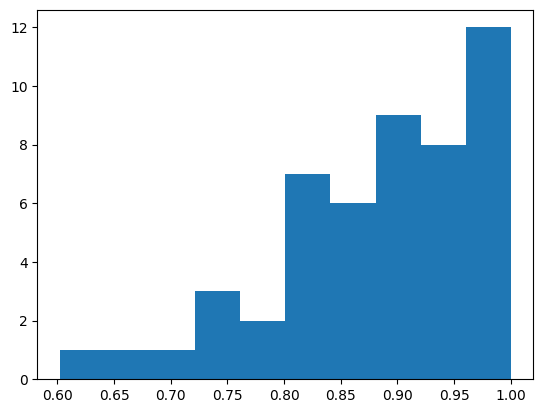

In [ ]:
plt.hist(auc_stored)

(array([ 1.,  0.,  3.,  7.,  4.,  4.,  3.,  7., 11., 10.]),
 array([0.625 , 0.6625, 0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875,
        0.925 , 0.9625, 1.    ]),
 <BarContainer object of 10 artists>)

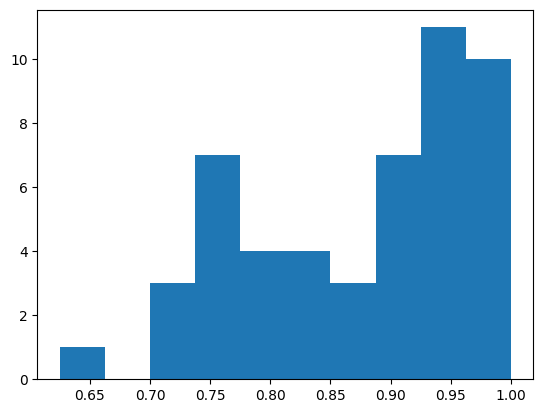

In [ ]:
plt.hist(auc_stored)

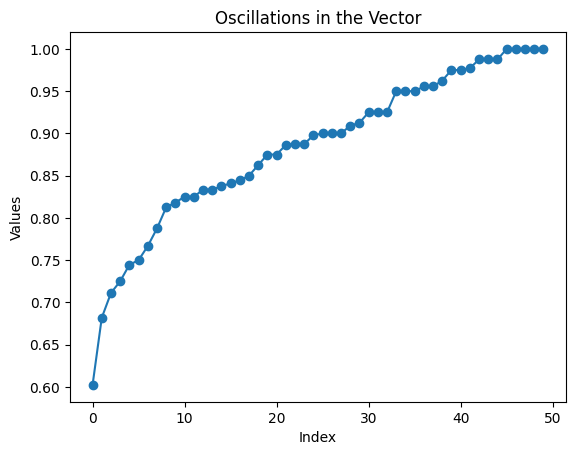

In [ ]:

# Create a plot
plt.plot(sorted(auc_stored), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Oscillations in the Vector')

# Show the plot
plt.show()

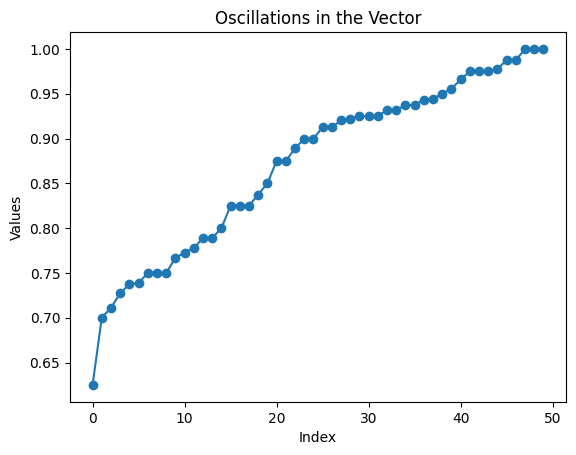

In [ ]:

# Create a plot
plt.plot(sorted(auc_stored), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Oscillations in the Vector')

# Show the plot
plt.show()

In [243]:
dataset1.to_json('/content/drive/MyDrive/FDS_final/filtered_heart.json', orient='records', lines=True)

## READ DIRECTLY THE FILTERED FILE

In [246]:
file_path="/content/drive/MyDrive/FDS_final/filtered_heart.json"

# Inizializza una lista per contenere i dati JSON
data_list = []

with open(file_path, 'r') as file:
    for line in file:
        # Carica l'oggetto JSON dalla riga corrente
        data = json.loads(line)
        # Aggiungi l'oggetto alla lista
        data_list.append(data)


# Now 'data' is a list of JSON objects
filtered_heart = pd.DataFrame(data_list)

### riassunto


Se il tuo obiettivo principale è verificare se hai imputato correttamente le variabili in vista dell'utilizzo di un modello logistico, puoi seguire alcune pratiche di validazione. Ecco alcuni suggerimenti:

Confronto con i dati originali: Confronta le distribuzioni delle variabili prima e dopo l'imputazione. Puoi utilizzare grafici o misure statistiche per valutare quanto le distribuzioni siano cambiate. Assicurati che le imputazioni non abbiano introdotto distorsioni significative rispetto ai dati originali.

###############FATTA############

**Validazione incrociata:** Se disponi di dati sufficienti, considera l'utilizzo della validazione incrociata. Dividi il tuo set di dati in modo casuale in sottoinsiemi di training e test, esegui l'imputazione sui dati di training e valuta le prestazioni del tuo modello logistico sui dati di test. Questo può fornire una stima dell'efficacia delle imputazioni nella predizione.

###############FATTA######################

**Verifica del modello logistico:** Dopo l'imputazione, costruisci il tuo modello logistico utilizzando le variabili imputate. Valuta le metriche di performance del modello come l'accuratezza, l'area sotto la curva ROC (AUC-ROC), precisione, richiamo, ecc. Puoi confrontare queste metriche con quelle ottenute utilizzando le variabili originali o altri metodi di imputazione.

**Sensitivity Analysis:** Puoi eseguire un'analisi di sensibilità per valutare come piccole variazioni nelle imputazioni influenzino le stime del modello logistico. Ciò può darti un'idea della robustezza del tuo modello rispetto alle imputazioni.

**Analisi degli errori:** Analizza gli errori del modello logistico. Se ci sono modelli di errore sistematici o se il modello sembra sbagliarsi in modo coerente per alcune osservazioni, potrebbe essere un segnale che le imputazioni non sono ideali.

    > potremmo focalizzarci su una misura che si concentra sui falsi positivi: precision

Ricorda che l'obiettivo finale è avere un modello logistico che sia accurato nella sua previsione, quindi qualsiasi decisione sull'imputazione dovrebbe essere guidata dalla miglior performance del modello finale. Utilizza la validazione e le analisi descritte sopra per guidare le tue decisioni.

### riassunto 2


Se le tue variabili sono categoriche e assumono valori discreti come 1, 2, 3, ..., l'uso di intervalli di confidenza potrebbe non essere la metrica più appropriata per valutare la correttezza delle imputazioni. Gli intervalli di confidenza sono spesso utilizzati quando si lavora con variabili continue.

In presenza di variabili categoriche, potresti invece considerare altre metriche o approcci per valutare la bontà delle imputazioni. Alcune opzioni potrebbero includere:

1. *Confronto delle distribuzioni:* Confronta la distribuzione delle variabili prima e dopo l'imputazione. Puoi utilizzare grafici a barre o altre visualizzazioni per vedere se la forma della distribuzione è rimasta simile.

2. *Proporzione di valori imputati:* Calcola la proporzione di valori imputati rispetto al totale per ciascuna variabile. Una proporzione troppo alta potrebbe indicare una forte dipendenza dall'imputazione.

3. *Analisi di sensibilità:* Valuta la sensibilità del tuo modello logistico a variazioni nelle imputazioni. Puoi eseguire analisi di sensibilità modificando leggermente le imputazioni e osservando come ciò influisce sulle prestazioni del modello.

4. *Validazione incrociata con modelli di classificazione:* Se il tuo modello finale è un modello di classificazione logistica, esegui la validazione incrociata (cross-validation) con modelli di classificazione e valuta le metriche come l'accuratezza, la precisione, il richiamo, ecc.

5. *Matrice di confusione:* Valuta la matrice di confusione del tuo modello di classificazione logistica per vedere come il modello si comporta nella previsione delle diverse classi.

Ricorda che la scelta delle metriche dipende dai dettagli specifici del tuo problema e dagli obiettivi dell'analisi. Adatta le metriche di valutazione alle caratteristiche delle tue variabili e al tipo di modello che stai utilizzando.




Test statistici: Utilizza test statistici per confrontare distribuzioni, ad esempio il test di Kolmogorov-Smirnov, il test di Anderson-Darling o il test di Shapiro-Wilk.



Confronto di quantili: Calcola quantili prima e dopo l'imputazione per valutare come le code della distribuzione sono cambiate.

## confronto dataset imputato e non?

`slope` 30% dei missing

# Computed  Somers' D  : to investigate if interesting


### steps:

Resample the data with replacement.
1. Refit the same model to the resampled data.
2. Evaluate the performance of the refit model on the resampled data set (using a index such as Somers’ D).
3. Evaluate the performance of the refit model on the original data set.
4. Take the difference between steps 3 and 4.
5. Repeat steps 1--5 about 200 times.
6. Take the average of the 200 differences and subtract it from the original index estimate to get a bias-corrected estimate of how

In [ ]:
dataset = dataset.fillna(dataset.mean())

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the columns you want to normalize
columns_to_normalize = ["age"	,"sex",	"cp",	"trestbps",	"chol",	"fbs"	,"restecg",	"thalch",	"exang"	,"oldpeak",	"slope"	]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1.007386,-0.516931,0.962032,0.698041,0.311021,2.357590,1.734498,0.495698,-8.239177e-01,1.349421,-2.437573e+00,0
1,1.432034,-0.516931,-0.770002,1.511761,0.797713,-0.470155,1.734498,-1.175955,1.290886e+00,0.589832,-4.544077e-01,1
2,1.432034,-0.516931,-0.770002,-0.658158,0.274289,-0.470155,1.734498,-0.340128,1.290886e+00,1.634267,-4.544077e-01,1
3,-1.752828,-0.516931,0.096015,-0.115679,0.467130,-0.470155,-0.751480,1.968345,-8.239177e-01,2.488805,-2.437573e+00,0
4,-1.328180,1.934494,1.828048,-0.115679,0.044717,-0.470155,1.734498,1.371326,-8.239177e-01,0.494884,1.528757e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,1.934494,-0.770002,-0.278423,1.229308,2.357590,0.491509,0.654903,-8.239177e-01,-0.834397,4.403511e-16,1
916,0.901224,-0.516931,0.962032,0.000000,-0.552169,-0.470155,0.491509,0.000000,1.173952e-16,0.000000,4.403511e-16,0
917,0.158089,-0.516931,-0.770002,-0.549662,0.219192,2.357590,0.491509,-1.494365,-8.239177e-01,-0.834397,4.403511e-16,1
918,0.476575,-0.516931,-0.770002,0.000000,1.706817,2.357590,1.734498,0.000000,1.173952e-16,0.000000,4.403511e-16,0


In [ ]:
# Supponiamo che tu abbia un DataFrame pandas df con le tue features e target

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('num', axis=1), dataset['num'], test_size=0.2, random_state=42)

# Definisci il modello di base (Logistic Regression)
base_model = LogisticRegression()

# Definisci il modello Bagging utilizzando il Bootstrap
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Addestra il modello Bagging
bagging_model.fit(X_train, y_train)

# Valuta le performance sul test set
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8206521739130435


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from lifelines.utils import concordance_index


# Imposta il seed
np.random.seed(11)

# Campionamento casuale delle righe del DataFrame
#resample with replacement
i = np.random.choice(dataset.index, size=len(dataset), replace=True)
df_sampled = dataset.loc[i]

# Addestramento del modello di regressione logistica
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('num', axis=1), dataset['num'], test_size=0.2, random_state=11)


model = LogisticRegression()
model.fit(X_train, y_train)

# Calcolo dell'indice di Somers' D sul training set
y_train_pred = model.predict_proba(X_train)[:, 1]
# Calculate Somers' D on the training set
D_train = concordance_index(y_train, -y_train_pred)

# Calcolo dell'indice di Somers' D sul test set
y_test_pred = model.predict_proba(X_test)[:, 1]
# Calculate Somers' D on the test set
D_test = concordance_index(y_test, -y_test_pred)


# Calcolo della differenza tra Somers' D sul training set e sul test set
D_diff = D_train - D_test


# Calculate Somers' D on the original data
y_orig_pred = model.predict_proba(X_train)[:, 1]
D_orig = concordance_index(y_train, -y_orig_pred)

# Visualizzazione dei risultati
result_df = pd.DataFrame({
    "Original": [D_orig],
    "Corrected": [D_orig - D_diff]
})
print(result_df)

   Original  Corrected
0  0.109373   0.132812


In [ ]:
import statsmodels.api as sm
import numpy as np

def somersd(data, index):
    # Train
    train_data = data.iloc[index]
    train_model = sm.GLM(X_train, y_train, family=sm.families.Binomial()).fit()
    D_train = 2 * sm.stats.cobs(predicted=train_model.fittedvalues, actual=train_model.model.endog)['cobs']

    # Test
    test_model = sm.GLM(X_test, y_test_pred, family=sm.families.Binomial()).fit()
    D_test = 2 * sm.stats.cobs(predicted=test_model.fittedvalues, actual=test_model.model.endog)['cobs']

    return D_train - D_test

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
import numpy as np

np.random.seed(222)

# Assuming df_sampled is your DataFrame
n_iterations = 200
boot_samples = []

# Extract the "num" column for resampling
num_column = df_sampled["num"]

for _ in range(n_iterations):
    resampled_indices = resample(np.arange(len(df_sampled)))
    y_true = num_column.iloc[resampled_indices]
    y_scores = np.random.rand(len(y_true))  # Replace this with your model's predicted probabilities
    boot_samples.append(roc_auc_score(y_true, y_scores))

# Convert the list to a NumPy array for easy calculation of mean and standard deviation
boot_samples = np.array(boot_samples)

# Access the results
boot_samples_mean = boot_samples.mean()
boot_samples_std = boot_samples.std()

print("Bootstrap Mean ROC-AUC:", boot_samples_mean)
print("Bootstrap Standard Deviation ROC-AUC:", boot_samples_std)

Bootstrap Mean ROC-AUC: 0.5018205359238437
Bootstrap Standard Deviation ROC-AUC: 0.02027180981361405


# capire se ha senso o cambiare facendo il campionamento proporzionale usando logistic l'attributo class_weigth = "balanced"